## 1. Intro

Content

This dataset contains the temperature readings from IOT devices installed outside and inside of an anonymous Room (say - admin room). The device was in the alpha testing phase. So, It was uninstalled or shut off several times during the entire reading period ( 28-07-2018 to 08-12-2018). This random interval recordings and few mis-readings ( outliers) makes it more challanging to perform analysis on this data. Let's see, what you can present in the plate out of this messy data.

columns = 5 | Rows = 97605

id : unique IDs for each reading

room_id/id : room id in which device was installed (inside and/or outside) -> currently 'admin room' only for example purpose.

noted_date : date and time of reading

temp : temperature readings

out/in : whether reading was taken from device installed inside or outside of room?

## 2. Get the Data & imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('./data/IOT-temp.csv')

In [3]:
dataset.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [22]:
dataset['noted_date'].duplicated().sum()

69686

In [5]:
# ther is no nan values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [7]:
dataset.describe(include='all')

,id,room_id/id,noted_date,temp,out/in
count,97606,97606,97606,97606.000000,97606
unique,97605,1,27920,NaN,2
top,__export__.temp_log_196108_4a983c7e,Room Admin,12-09-2018 03:09,NaN,Out
freq,2,97606,65,NaN,77261
mean,NaN,NaN,NaN,35.053931,NaN
std,NaN,NaN,NaN,5.699825,NaN
min,NaN,NaN,NaN,21.000000,NaN
25%,NaN,NaN,NaN,30.000000,NaN
50%,NaN,NaN,NaN,35.000000,NaN
75%,NaN,NaN,NaN,40.000000,NaN


## Data Cleaning

In [9]:
# it seems the first two colomns can be removed without loosing any info

dataset.drop(['id','room_id/id'],axis=1,inplace=True)

In [11]:
dataset['noted_date'] = pd.to_datetime(dataset['noted_date'],format="%d-%m-%Y %H:%M")

In [87]:
dataset.drop_duplicates(inplace=True)

In [93]:
dataset.head()

,noted_date,temp,out/in,hour,day,weekday,month
0,2018-12-08 09:30:00,29,In,9,8,5,12
2,2018-12-08 09:29:00,41,Out,9,8,5,12
4,2018-12-08 09:29:00,31,In,9,8,5,12
6,2018-12-08 09:28:00,29,In,9,8,5,12
8,2018-12-08 09:26:00,29,In,9,8,5,12


## EDA

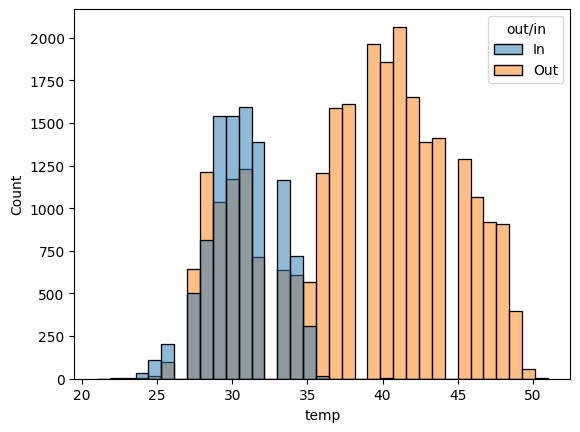

In [88]:
sns.histplot(dataset,x='temp',bins=35,hue='out/in')
plt.show()

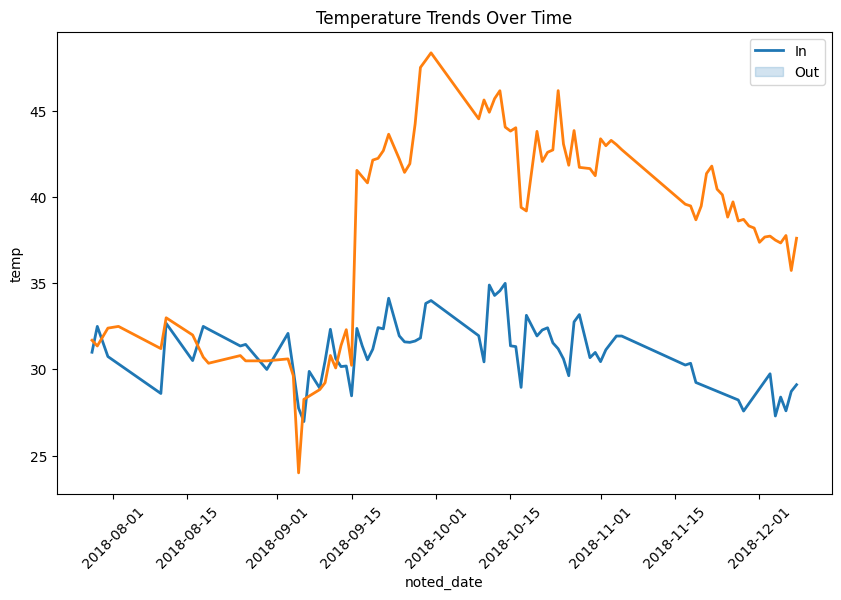

In [129]:
daily_in = pd.DataFrame(dataset[dataset['out/in']=='In'].set_index('noted_date')['temp'].resample('D').mean())
daily_out = pd.DataFrame(dataset[dataset['out/in']=='Out'].set_index('noted_date')['temp'].resample('D').mean())

plt.figure(figsize=(10,6))
sns.lineplot(daily_in, x=daily_in.index, y='temp',linewidth=2,legend='auto')
sns.lineplot(daily_out, x=daily_out.index, y='temp',linewidth=2,legend='auto')
plt.title('Temperature Trends Over Time')
plt.legend(['In','Out'])
plt.xticks(rotation=45)
plt.show()

#### seasonal decomposition of the temperature data

`seasonal_decompose function`is used to decompose time-series data into its fundamental components: Trend, Seasonality, and Residuals.

The `period=24` argument specifies the frequency of the seasonal component, meaning the function expects a repeating seasonal pattern every 24 data points (this could represent hourly data for one day if the data is collected every hour).

    Trend:    
    Shows the long-term direction in the time series (whether temperatures are increasing, decreasing, or staying stable over time).
    
    Seasonality:    
    Captures repeating patterns over a fixed period (in this case, every 24 time steps, which might represent daily cycles).
    
    Residual: 
    The "leftover" part of the time series after removing the trend and seasonality. These are random fluctuations or noise that cannot be explained by the model.

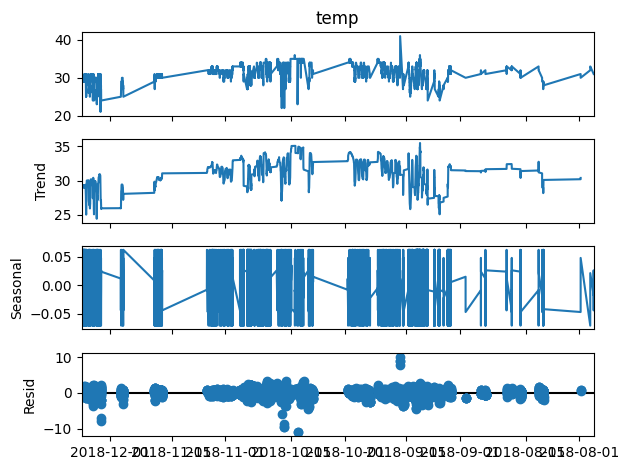

In [143]:
from statsmodels.tsa.seasonal import seasonal_decompose

indoor_data = dataset[dataset['out/in'] == 'In'].set_index('noted_date')
result = seasonal_decompose(indoor_data['temp'], model='additive', period=24)
result.plot()
plt.show()

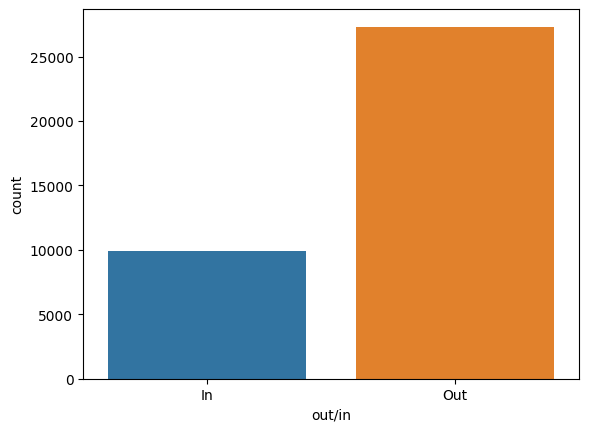

In [89]:
sns.countplot(dataset,x='out/in',hue='out/in')
plt.show()

## Feature Engineering

In [90]:
def extract_time_features(df):
    df['hour'] = df.noted_date.dt.hour
    df['day'] = df.noted_date.dt.day
    df['weekday'] = df.noted_date.dt.weekday
    df['month'] = df.noted_date.dt.month
    return df

In [91]:
dataset = extract_time_features(dataset)

In [92]:
dataset.head()

,noted_date,temp,out/in,hour,day,weekday,month
0,2018-12-08 09:30:00,29,In,9,8,5,12
2,2018-12-08 09:29:00,41,Out,9,8,5,12
4,2018-12-08 09:29:00,31,In,9,8,5,12
6,2018-12-08 09:28:00,29,In,9,8,5,12
8,2018-12-08 09:26:00,29,In,9,8,5,12


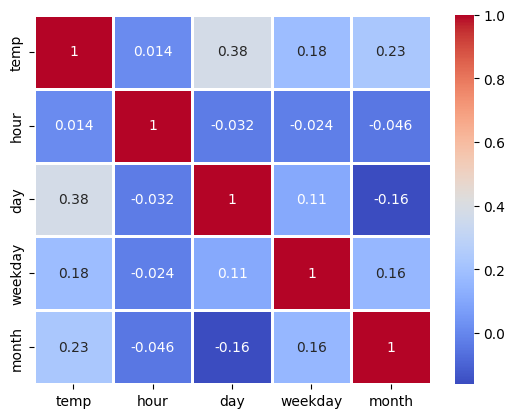

In [151]:
corr_matrix = dataset.drop(['out/in','noted_date'],axis=1).corr()
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True,linewidth=2)
plt.show()
# temp and day are the most correlated

In [29]:
X = dataset[['temp','out/in','hour','day','weekday','month']].copy()
y = X.pop('temp')

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,stratify=X['out/in'])

In [74]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
    [
        ('encoder', OneHotEncoder(),['out/in'])
        
    ],
    remainder='passthrough'
)

In [75]:
X_train = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())

In [76]:
X_train.head()

,encoder__out/in_In,encoder__out/in_Out,remainder__hour,remainder__day,remainder__weekday,remainder__month
0,0.0,1.0,7.0,17.0,2.0,10.0
1,1.0,0.0,10.0,9.0,6.0,9.0
2,0.0,1.0,14.0,18.0,3.0,10.0
3,0.0,1.0,11.0,18.0,3.0,10.0
4,0.0,1.0,3.0,18.0,3.0,10.0


In [77]:
X_test = pd.DataFrame(transformer.transform(X_test),columns=transformer.get_feature_names_out())

## Models

In [78]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(X_train,y_train)

RandomForestRegressor()

In [79]:
predictions = forest_model.predict(X_test)

In [81]:
from sklearn import metrics

mse = metrics.mean_squared_error(y_test, predictions)
rmse = metrics.root_mean_squared_error(y_test, predictions)
R2 = metrics.r2_score(y_test, predictions)

# print(f"Accuracy: {accuracy:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {R2:.4f}")
print('=====================================================')

MSE: 0.4986
RMSE: 0.7061
R2: 0.9847


In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

vif_data.sort_values(by = 'VIF', ascending=False)

,Feature,VIF
1,encoder__out/in_Out,99.290887
0,encoder__out/in_In,24.907249
4,remainder__weekday,1.061968
5,remainder__month,1.054588
3,remainder__day,1.053659
2,remainder__hour,1.025940


## Summary of the Result:

MSE of `0.4986`: The average squared error is low, indicating small errors in predictions.

RMSE of `0.7061`: On average, the model's predictions are about 0.71 units away from the actual values, which is a small error in most cases.

R² of `0.9847`: The model explains 98.47% of the variance in the data, showing it has a very strong fit to the observed data.

Overall, these results indicate that the model is performing well, with accurate predictions and a very strong fit to the data.